In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import array

# Load training and testing video
- Load mp4 videos
- Load annotated speeds for both test and training


In [39]:
import cv2

vcap = cv2.VideoCapture('train.mp4') #
vcapTest = cv2.VideoCapture('test.mp4') #
# width  = int(vcap.get(cv2.CAP_PROP_FRAME_WIDTH))   # float
# height = int(vcap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # float

In [21]:
import json
#load training data
with open('train.txt', 'r') as file_:
            gt = file_.readlines()
            gt = [float(x.strip()) for x in gt]
#load training data

with open('testSample.json') as f:
      bt = json.load(f)
           

gt = np.array(gt[:20400])


# Create Model
- Model contains 8 layers
   - Utilizes Relu Activation
- two full connected layers at the end
- output of 36 because the max speed in first vid tops at 36


In [22]:
#model
model = models.Sequential()
model.add(layers.Conv2D(220, (3, 3), activation='relu', input_shape=(220, 570, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(36))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 218, 568, 220)     2200      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 109, 284, 220)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 107, 282, 64)      126784    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 141, 64)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 51, 139, 64)       36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 453696)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

# Create training and testing frames
- Take each individual frame from the video
    - Turn frame black and white
    - and decrease the dimensionality of the frames
    - Why? Initial Frames too large to train

In [40]:
indx = 0
trainImages = []

while vcap.isOpened() and indx < len(gt):
    ret, frame = vcap.read()

    # Convert to B/W
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = frame_gray[130:350, 35:605]
    trainImages.append(frame_gray)
    indx = indx + 1

indxT = 0
testImages = []
testLabels = []
while vcapTest.isOpened() and indxT < len(bt):
    ret, frame = vcapTest.read()

    # Convert to B/W
    try:
        frame_grayT = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_grayT = frame_grayT[130:350, 35:605]
        testImages.append(frame_grayT)
        testLabels.append(bt[indxT][1])
        indxT = indxT + 1
    except:
        indxT = len(bt)
#set test labels to array for run function
testLabels = np.asarray(testLabels)

array([2.02271467, 2.04087188, 2.06239438, ..., 0.        , 0.        ,
       0.        ])

In [9]:
trainImages2 = np.expand_dims(trainImages, -1)
testImages2 = np.expand_dims(testImages, -1)

# Run model
- Measure model on accuracy
- Utilized cross entropy for loss calculation

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainImages2, gt, epochs=2, 
                    validation_data=(testImages2, testLabels))



Train on 20400 samples, validate on 8616 samples
Epoch 1/2
20400/20400 [==============================] - 6008s 294ms/sample - loss: 2.0864 - accuracy: 0.0325 - val_loss: 8.8032 - val_accuracy: 0.0000e+00
Epoch 2/2
20400/20400 [==============================] - 6742s 330ms/sample - loss: 0.3264 - accuracy: 0.0341 - val_loss: 11.9643 - val_accuracy: 0.0000e+00


# Plot Output

{'loss': [2.0863905339103703, 0.32637842226408276], 'accuracy': [0.03254902, 0.03406863], 'val_loss': [8.803160035621268, 11.964296985580175], 'val_accuracy': [0.0, 0.0]}


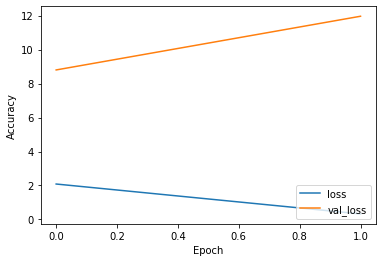

In [58]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
print((history.history))
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)